In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib 

In [2]:
df = pd.read_csv("sample_1pml_1570512675146.csv")

In [3]:
df.head()
#可能であれば，Latitude&Longtitudeから郵便番号なり，市外局番，最寄り駅を取得したい！！

,CanDispatch,CarImage,CompanyID,Direction,DisplayName,DriverNumber,Latitude,Longitude,RadioNumber,SpeedFrom,SpeedTo,StatusTime,VehicleStatus
0,False,yellow,1,248,普通車,167007,35.690970,139.754970,4285,75,75.0,2016-06-28 20:43:20,実車
1,False,black,1,59,黒タク,40634,35.684328,139.785427,454,55,55.0,2016-10-19 03:31:41,実車
2,False,black,1,88,黒タク,40634,35.695951,139.756240,1544,41,41.0,2016-06-03 11:19:25,実車
3,False,yellow,1,339,普通車,115905,35.673969,139.723400,3355,54,54.0,2016-12-07 17:28:46,実車
4,False,black,1,101,黒タク,40634,35.694710,139.785870,1544,47,47.0,2016-10-31 20:35:05,実車


In [4]:
df['StatusTime'][0]

'2016-06-28 20:43:20'

In [5]:
df['Time'] = pd.to_datetime(df['StatusTime'])
df['hour'] = df['Time'].dt.hour

In [6]:
df["date"]=df.loc[:,'Time'].dt.strftime("%Y-%m-%d")

In [7]:
df.head(10)

,CanDispatch,CarImage,CompanyID,Direction,DisplayName,DriverNumber,Latitude,Longitude,RadioNumber,SpeedFrom,SpeedTo,StatusTime,VehicleStatus,Time,hour,date
0,False,yellow,1,248,普通車,167007,35.690970,139.754970,4285,75,75.0,2016-06-28 20:43:20,実車,2016-06-28 20:43:20,20,2016-06-28
1,False,black,1,59,黒タク,40634,35.684328,139.785427,454,55,55.0,2016-10-19 03:31:41,実車,2016-10-19 03:31:41,3,2016-10-19
2,False,black,1,88,黒タク,40634,35.695951,139.756240,1544,41,41.0,2016-06-03 11:19:25,実車,2016-06-03 11:19:25,11,2016-06-03
3,False,yellow,1,339,普通車,115905,35.673969,139.723400,3355,54,54.0,2016-12-07 17:28:46,実車,2016-12-07 17:28:46,17,2016-12-07
4,False,black,1,101,黒タク,40634,35.694710,139.785870,1544,47,47.0,2016-10-31 20:35:05,実車,2016-10-31 20:35:05,20,2016-10-31
5,False,yellow,1,54,普通車,115905,35.642862,140.079090,3355,90,90.0,2016-12-13 08:43:28,実車,2016-12-13 08:43:28,8,2016-12-13
6,True,yellow,1,195,普通車,115905,35.683940,139.774450,3301,44,44.0,2016-06-25 08:19:45,空車,2016-06-25 08:19:45,8,2016-06-25
7,False,black,8,172,黒タク,9044,35.647767,139.802700,1725,33,33.0,2016-10-21 08:30:06,離れ,2016-10-21 08:30:06,8,2016-10-21
8,False,yellow,1,294,普通車,112742,35.687003,139.725920,3180,44,44.0,2016-06-16 19:01:23,実車,2016-06-16 19:01:23,19,2016-06-16
9,False,yellow,1,318,普通車,140155,35.655963,139.861667,3841,1,1.0,2016-10-03 19:24:05,回送,2016-10-03 19:24:05,19,2016-10-03


In [8]:
gp_hour = df.groupby(df['Time'].dt.hour).size()
gp_hour

Time
0     505595
1     506042
2     452044
3     358147
4     239601
5     149496
6     170330
7     268762
8     410740
9     471946
10    464384
11    450489
12    442003
13    429659
14    420858
15    427924
16    423488
17    421789
18    440859
19    451583
20    444792
21    465127
22    478960
23    490230
dtype: int64

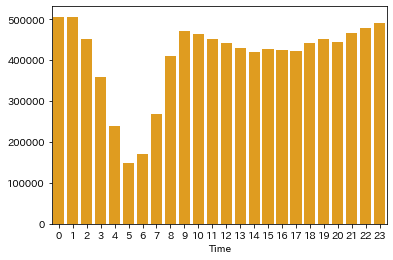

In [9]:
sns.barplot(gp_hour.index, gp_hour.values, color = 'orange')

# Week number
['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
が0, 1, 2, ,3, 4, 5, 6

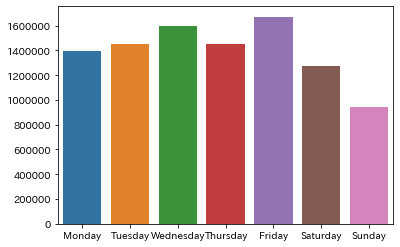

In [10]:
df['Week_num'] = df['Time'].dt.dayofweek
a = df.groupby(df['Week_num']).size()
order= ['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(order, a.values)

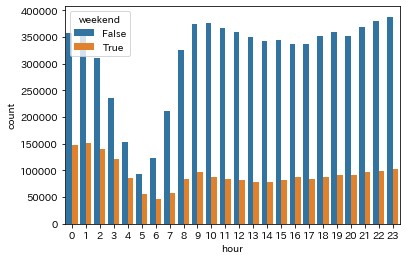

In [11]:
df['weekend'] = (df['Week_num'] == 5) | (df['Week_num'] == 6)
sns.countplot(x="hour", hue="weekend",data=df)

In [12]:
b = sum(df['weekend'] == False)
c= sum(df['weekend'] == True)
b,c

(7562236, 2222612)

In [13]:
d = df.groupby([df['weekend'], df['hour']]).size()
weekday_ratio = d.values[:24]/b
weekend_ratio = d.values[24:]/c

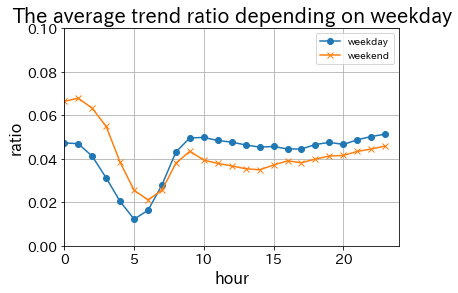

In [14]:
x_datas = range(0, 24)
plt.plot(x_datas, weekday_ratio, marker = 'o',label = 'weekday')
plt.plot(x_datas, weekend_ratio, marker = 'x',label = 'weekend')

#plt.xticks(x_hours, months)
plt.xlim(0, 24)
plt.ylim(0, 0.1) 

plt.title('The average trend ratio depending on weekday', fontsize = 20)
plt.xlabel('hour', fontsize = 16)
plt.ylabel('ratio', fontsize = 16)
plt.tick_params(labelsize=14)
plt.grid(True)
plt.legend(loc = 'upper right')
plt.show()

In [15]:
all_count = df.size
adicts={}
for i in range(7):
    #count = sum(df['Week_num']==i)
    a = df[df['Week_num']==i]
    gp=a.groupby(a['hour']).size()
    adicts[i] = gp/all_count
adicts[6]


hour
0     0.000347
1     0.000353
2     0.000319
3     0.000273
4     0.000188
5     0.000145
6     0.000132
7     0.000147
8     0.000209
9     0.000245
10    0.000217
11    0.000202
12    0.000190
13    0.000187
14    0.000185
15    0.000190
16    0.000206
17    0.000212
18    0.000224
19    0.000229
20    0.000233
21    0.000242
22    0.000249
23    0.000247
dtype: float64

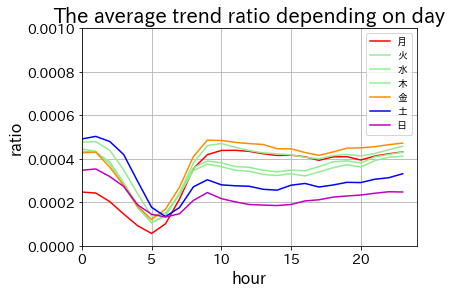

In [16]:
alist=["火","水","木"]
k=0
for i in range(7):
    if i == 0:
        plt.plot(x_datas, adicts[i],color = "r",label = "月")
    elif i == 5:
        plt.plot(x_datas, adicts[i],color = "b",label = "土")
    elif i == 6:
        plt.plot(x_datas, adicts[i],color = "m",label = "日")
    elif i == 4:
        plt.plot(x_datas, adicts[i],color = "darkorange",label = "金")
    else:
        plt.plot(x_datas, adicts[i],color = "lightgreen",label = alist[k])
        k+=1
#plt.xticks(x_hours, months)
plt.xlim(0, 24)
plt.ylim(0, 0.001) 

plt.title('The average trend ratio depending on day', fontsize = 20)
plt.xlabel('hour', fontsize = 16)
plt.ylabel('ratio', fontsize = 16)
plt.tick_params(labelsize=14)
plt.grid(True)
plt.legend(loc = 'upper right')
plt.show()

In [17]:
df.size

176127264

深夜から早朝にかけて週末と平日で差があるかも

In [18]:
df.sample(10)

,CanDispatch,CarImage,CompanyID,Direction,DisplayName,DriverNumber,Latitude,Longitude,RadioNumber,SpeedFrom,SpeedTo,StatusTime,VehicleStatus,Time,hour,date,Week_num,weekend
7778356,True,yellow,3,45,普通車,5131166,35.647341,139.748155,5492,30,39.0,2017-09-20 11:45:44,空車,2017-09-20 11:45:44,11,2017-09-20,2,False
3126184,True,black,3,90,黒タク,131563,35.713943,139.635356,4351,10,19.0,2016-08-10 16:01:48,空車,2016-08-10 16:01:48,16,2016-08-10,2,False
7326107,False,green,6,45,普通車,390401,35.646343,139.701798,991,0,0.0,2016-08-19 00:12:31,空車,2016-08-19 00:12:31,0,2016-08-19,4,False
5422710,True,black,2,270,黒タク,16029017,35.606879,139.738555,1203,41,50.0,2017-11-30 21:09:29,空車,2017-11-30 21:09:29,21,2017-11-30,3,False
5810830,False,yellow,9,270,普通車,20445358,35.668335,139.697966,2204,21,30.0,2016-11-27 18:44:55,実車,2016-11-27 18:44:55,18,2016-11-27,6,True
7986216,True,black,8,68,黒タク,8954,35.762667,139.710600,2046,39,39.0,2016-04-21 01:33:54,空車,2016-04-21 01:33:54,1,2016-04-21,3,False
6006692,False,black,6,135,黒タク,100925,35.703823,139.709850,1036,0,0.0,2018-03-09 11:16:56,休憩,2018-03-09 11:16:56,11,2018-03-09,4,False
6286964,True,black,9,180,黒タク,20445358,35.710465,139.760048,2233,41,50.0,2018-01-16 00:00:25,空車,2018-01-16 00:00:25,0,2018-01-16,1,False
7141832,False,green,6,180,普通車,390401,35.549657,139.740877,991,51,60.0,2017-05-16 13:00:11,空車,2017-05-16 13:00:11,13,2017-05-16,1,False
6395806,True,yellow,1,310,普通車,115905,35.741195,139.681830,3355,32,32.0,2017-05-16 02:43:16,空車,2017-05-16 02:43:16,2,2017-05-16,1,False


In [78]:
a=df[(df["DriverNumber"]== 3265)&(df["date"]=="2018-03-24")]
a[a["VehicleStatus"]=="迎車"]

,CanDispatch,CarImage,CompanyID,Direction,DisplayName,DriverNumber,Latitude,Longitude,RadioNumber,SpeedFrom,SpeedTo,StatusTime,VehicleStatus,Time,hour,Week_num,weekend,date
229882,False,black,7,90,黒タク,3265,35.674876,139.826717,1153,18,18.0,2018-03-24 07:06:58,迎車,2018-03-24 07:06:58,7,5,True,2018-03-24
543944,False,black,7,45,黒タク,3265,35.620360,139.777146,1153,18,18.0,2018-03-24 07:49:32,迎車,2018-03-24 07:49:32,7,5,True,2018-03-24
545561,False,black,7,90,黒タク,3265,35.676660,139.824833,1153,18,18.0,2018-03-24 07:05:27,迎車,2018-03-24 07:05:27,7,5,True,2018-03-24
861520,False,black,7,225,黒タク,3265,35.620709,139.774050,1153,18,18.0,2018-03-24 07:38:33,迎車,2018-03-24 07:38:33,7,5,True,2018-03-24
870301,False,black,7,180,黒タク,3265,35.659287,139.824025,1153,18,18.0,2018-03-24 07:09:58,迎車,2018-03-24 07:09:58,7,5,True,2018-03-24
876470,False,black,7,180,黒タク,3265,35.654634,139.824446,1153,18,18.0,2018-03-24 07:12:00,迎車,2018-03-24 07:12:00,7,5,True,2018-03-24
886056,False,black,7,225,黒タク,3265,35.665111,139.824625,1153,18,18.0,2018-03-24 07:08:53,迎車,2018-03-24 07:08:53,7,5,True,2018-03-24
1164274,False,black,7,180,黒タク,3265,35.661249,139.823880,1153,18,18.0,2018-03-24 07:09:34,迎車,2018-03-24 07:09:34,7,5,True,2018-03-24
1170634,False,black,7,225,黒タク,3265,35.640360,139.803471,1153,18,18.0,2018-03-24 07:18:12,迎車,2018-03-24 07:18:12,7,5,True,2018-03-24
1173142,False,black,7,225,黒タク,3265,35.638194,139.799121,1153,18,18.0,2018-03-24 07:19:57,迎車,2018-03-24 07:19:57,7,5,True,2018-03-24


#driver numbeer が5131159の人の日別空車率

In [32]:

dr=df[df["DriverNumber"]==5131159]
dr_sorted_ratio = dr.groupby(dr["date"]).apply(lambda x:x[x["VehicleStatus"]=="空車"].size/x.size).sort_values(ascending =False)

In [33]:
dr_sorted_ratio

date
2017-04-05    0.817259
2017-06-04    0.811828
2017-07-02    0.790850
2017-03-08    0.724638
2018-03-18    0.722222
2017-02-04    0.695431
2016-06-09    0.693989
2016-09-11    0.689815
2017-12-25    0.687500
2017-02-24    0.681481
2016-06-17    0.681250
2016-07-25    0.679245
2016-08-20    0.674556
2016-08-18    0.674419
2018-02-27    0.662252
2016-09-25    0.653846
2016-09-29    0.651982
2017-08-31    0.650909
2016-12-08    0.647059
2017-07-22    0.642857
2017-03-24    0.631902
2017-06-12    0.631579
2017-06-16    0.630952
2017-02-08    0.626943
2016-11-20    0.615741
2016-05-12    0.615079
2017-03-27    0.612903
2016-09-17    0.600000
2016-08-16    0.584699
2017-12-29    0.576355
                ...   
2016-05-28    0.256705
2017-04-13    0.256637
2016-09-20    0.256188
2018-02-07    0.248120
2016-07-03    0.245033
2017-02-06    0.244444
2016-08-19    0.234839
2016-07-14    0.233333
2016-04-05    0.227273
2017-09-07    0.227034
2017-06-28    0.219124
2016-10-29    0.212500
2017-0

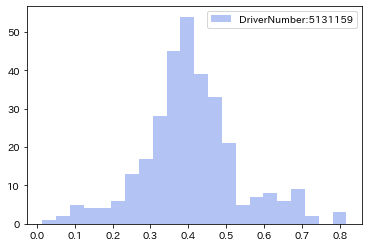

In [34]:
sns.distplot(
    dr_sorted_ratio, color='royalblue', label='DriverNumber:5131159',kde=False)
plt.legend()
plt.show()

In [37]:
dr_sort = dr.sort_values(by=['StatusTime'])
dr_sort["VehicleStatus"].unique()

array(['空車', '休憩', '実車', '迎車'], dtype=object)

In [132]:
a = ((dr_sort["VehicleStatus"]== "実車").values).astype(np.int)
alist = np.diff(a)
blist = (alist == 1)
clist = (alist == -1)
sum(alist),sum(blist), sum(clist)
#np.count_nonzero(alist == 1), np.count_nonzero(alist == -1),np.count_nonzero(alist == 0)

(0, 5241, 5241)

In [135]:
blist = np.append(blist,0)
clist = np.append(clist,0)
a[blist]

array([0, 0, 0, ..., 0, 0, 0])

In [127]:
a=np.array([0,1,1,1,0,0,0,0,1,1])
alist = np.diff(a)
blist = (alist == 1)
clist = (alist == -1)

In [130]:
np.append(a, 0)

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0])

In [82]:
alist,sum(alist), blist,sum(blist), clist, sum(clist)

(array([ 1,  0,  0, -1,  0,  0,  0,  1,  0]),
 1,
 array([ True, False, False, False, False, False, False,  True, False]),
 2,
 array([False, False, False,  True, False, False, False, False, False]),
 1)

In [22]:
df['VehicleStatus'].unique()

array(['実車', '空車', '離れ', '回送', '支払', '待機', '賃走', '迎車', '割増', '休憩', '閉局',
       '了解', '不在', '貸切', '緊急', '非常', '電障'], dtype=object)

In [18]:
df['VehicleStatus'].value_counts()

空車    4378817
実車    2204618
回送     894947
賃走     892863
離れ     499198
休憩     351643
支払     170474
迎車     164712
割増     125076
閉局      50800
待機      39133
不在       7953
貸切       2977
了解        868
電障        675
緊急         48
非常         46
Name: VehicleStatus, dtype: int64

In [19]:
df[df['CanDispatch'] == True].loc[:, 'VehicleStatus'].unique()

array(['空車'], dtype=object)

In [20]:
df[df['CanDispatch'] == False].loc[:, 'VehicleStatus'].unique()

array(['実車', '離れ', '回送', '支払', '待機', '空車', '賃走', '迎車', '割増', '休憩', '閉局',
       '了解', '不在', '貸切', '緊急', '非常', '電障'], dtype=object)

In [21]:
df[(df['CanDispatch'] == False) & (df['VehicleStatus'] == '空車')].size

15836554

In [22]:
for i in df['CompanyID'].unique():
    print(i)
    print(df[df['CompanyID'] == i]['VehicleStatus'].unique())


1
['実車' '空車' '回送' '支払' '待機' '迎車' '閉局' '不在' '貸切']
8
['離れ' '実車' '空車' '了解' '緊急' '貸切']
3
['実車' '空車' '休憩' '迎車' '緊急' '閉局' '回送']
9
['空車' '実車' '回送' '支払' '休憩' '迎車' '閉局']
6
['賃走' '空車' '割増' '回送' '迎車' '休憩' '支払' '閉局' '貸切']
2
['賃走' '回送' '空車' '閉局' '迎車' '支払' '休憩']
7
['空車' '実車' '支払' '回送' '迎車' '非常' '閉局' '電障' '休憩' '貸切']


配車可能である車はすべて空車となる。

In [23]:
df[(df['DriverNumber']==42242)&(df['VehicleStatus']=='支払')].sort_values(by = 'StatusTime')

,CanDispatch,CarImage,CompanyID,Direction,DisplayName,DriverNumber,Latitude,Longitude,RadioNumber,SpeedFrom,SpeedTo,StatusTime,VehicleStatus,Time,hour,Week_num,weekend
4029801,False,black,1,334,黒タク,42242,35.650015,139.671710,228,14,14.0,2016-05-04 17:39:13,支払,2016-05-04 17:39:13,17,2,False
2718089,False,black,1,160,黒タク,42242,35.696000,139.613960,228,9,9.0,2016-05-04 20:44:51,支払,2016-05-04 20:44:51,20,2,False
1900590,False,black,1,268,黒タク,42242,35.607119,139.685460,228,29,29.0,2016-05-04 21:47:11,支払,2016-05-04 21:47:11,21,2,False
5623249,False,black,1,268,黒タク,42242,35.607119,139.685460,228,29,29.0,2016-05-04 21:47:41,支払,2016-05-04 21:47:41,21,2,False
3700220,False,black,1,284,黒タク,42242,35.551156,139.749260,228,11,11.0,2016-05-05 01:39:11,支払,2016-05-05 01:39:11,1,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1583999,False,black,1,346,黒タク,42242,35.679400,139.736200,210,24,24.0,2017-05-31 07:49:55,支払,2017-05-31 07:49:55,7,2,False
943125,False,black,1,338,黒タク,42242,35.679890,139.735916,210,24,24.0,2017-05-31 07:50:42,支払,2017-05-31 07:50:42,7,2,False
4074024,False,black,1,17,黒タク,42242,35.678402,139.765360,210,19,19.0,2017-05-31 08:57:27,支払,2017-05-31 08:57:27,8,2,False
302292,False,black,1,188,黒タク,42242,35.772759,139.732157,210,28,28.0,2017-05-31 09:38:53,支払,2017-05-31 09:38:53,9,2,False


In [24]:
pd.set_option('display.max_rows', 10000)

In [25]:
df[df['DriverNumber']==42242].sort_values(by = 'StatusTime').size

4734500

In [26]:
df['DriverNumber'].unique().size

42

*ピボットテーブル（2変数間の分析）とヒストグラム or 棒グラフ（1変数の分析）をつくろう*

In [27]:
#indexが行の項目→集計をしたい項目
#columnsで関係を見たいindex以外の変数を定める
#aggfuncで集計する方法を指定可能（len:データの個数,np.ave:平均値など自由に指定可能）

pd.pivot_table(df, index='CanDispatch', columns='DisplayName', values='SpeedFrom',aggfunc=len)

#色々なクロス表を作ってcsvで保存しておいてください！！→可能であれば可視化したいが・・・！(棒グラフ・折れ線etc)

DisplayName,普通車,黒タク
CanDispatch,,
False,3439754,2897839
True,1746899,1700356


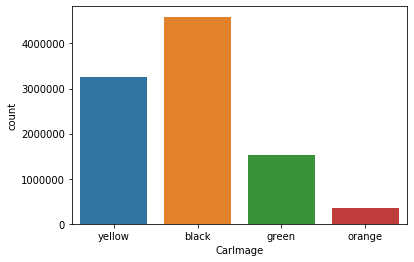

In [28]:
#https://pythondatascience.plavox.info/seaborn/%E6%A3%92%E3%82%B0%E3%83%A9%E3%83%95
sns.countplot(x="CarImage", data=df)

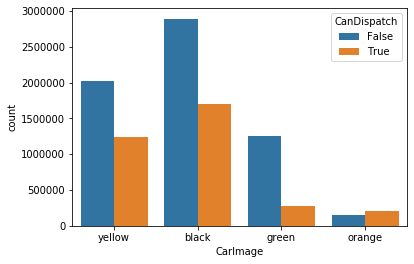

In [29]:
sns.countplot(x="CarImage", hue="CanDispatch",data=df)

In [9]:
df[(df['DriverNumber']==3265)&(df['StatusTime'].str.contains('2018-03-24 07'))].sort_values(by=['StatusTime']).head(100)

,CanDispatch,CarImage,CompanyID,Direction,DisplayName,DriverNumber,Latitude,Longitude,RadioNumber,SpeedFrom,SpeedTo,StatusTime,VehicleStatus,Time,hour,date
4390417,False,black,7,360,黒タク,3265,35.677102,139.824615,1153,18,18.0,2018-03-24 07:01:03,回送,2018-03-24 07:01:03,7,2018-03-24
2807265,False,black,7,360,黒タク,3265,35.677091,139.824603,1153,18,18.0,2018-03-24 07:02:34,回送,2018-03-24 07:02:34,7,2018-03-24
4360482,False,black,7,90,黒タク,3265,35.676842,139.824955,1153,18,18.0,2018-03-24 07:04:05,回送,2018-03-24 07:04:05,7,2018-03-24
545561,False,black,7,90,黒タク,3265,35.676660,139.824833,1153,18,18.0,2018-03-24 07:05:27,迎車,2018-03-24 07:05:27,7,2018-03-24
229882,False,black,7,90,黒タク,3265,35.674876,139.826717,1153,18,18.0,2018-03-24 07:06:58,迎車,2018-03-24 07:06:58,7,2018-03-24
1493814,False,black,7,180,黒タク,3265,35.671008,139.826076,1153,18,18.0,2018-03-24 07:07:57,迎車,2018-03-24 07:07:57,7,2018-03-24
3407522,False,black,7,180,黒タク,3265,35.667069,139.825701,1153,18,18.0,2018-03-24 07:08:34,迎車,2018-03-24 07:08:34,7,2018-03-24
886056,False,black,7,225,黒タク,3265,35.665111,139.824625,1153,18,18.0,2018-03-24 07:08:53,迎車,2018-03-24 07:08:53,7,2018-03-24
1164274,False,black,7,180,黒タク,3265,35.661249,139.823880,1153,18,18.0,2018-03-24 07:09:34,迎車,2018-03-24 07:09:34,7,2018-03-24
870301,False,black,7,180,黒タク,3265,35.659287,139.824025,1153,18,18.0,2018-03-24 07:09:58,迎車,2018-03-24 07:09:58,7,2018-03-24


In [10]:
df[(df['DriverNumber']==5131159)&(df['StatusTime'].str.contains('2017-04-04'))].sort_values(by=['StatusTime']).tail(10)

,CanDispatch,CarImage,CompanyID,Direction,DisplayName,DriverNumber,Latitude,Longitude,RadioNumber,SpeedFrom,SpeedTo,StatusTime,VehicleStatus,Time,hour,date
4859734,True,yellow,3,45,普通車,5131159,35.542101,139.640502,5502,50,59.0,2017-04-04 23:53:53,空車,2017-04-04 23:53:53,23,2017-04-04
7054758,True,yellow,3,45,普通車,5131159,35.542462,139.640835,5502,50,59.0,2017-04-04 23:53:57,空車,2017-04-04 23:53:57,23,2017-04-04
9105428,True,yellow,3,45,普通車,5131159,35.544684,139.642752,5502,50,59.0,2017-04-04 23:55:12,空車,2017-04-04 23:55:12,23,2017-04-04
9580692,True,yellow,3,360,普通車,5131159,35.546989,139.644696,5502,40,49.0,2017-04-04 23:55:33,空車,2017-04-04 23:55:33,23,2017-04-04
8319709,True,yellow,3,360,普通車,5131159,35.547406,139.644973,5502,40,49.0,2017-04-04 23:55:37,空車,2017-04-04 23:55:37,23,2017-04-04
8575182,True,yellow,3,360,普通車,5131159,35.550794,139.646168,5502,40,49.0,2017-04-04 23:56:11,空車,2017-04-04 23:56:11,23,2017-04-04
5952661,True,yellow,3,360,普通車,5131159,35.553377,139.647223,5502,40,49.0,2017-04-04 23:57:31,空車,2017-04-04 23:57:31,23,2017-04-04
6188044,True,yellow,3,360,普通車,5131159,35.553711,139.647362,5502,40,49.0,2017-04-04 23:57:35,空車,2017-04-04 23:57:35,23,2017-04-04
7501359,True,yellow,3,360,普通車,5131159,35.554155,139.647529,5502,30,39.0,2017-04-04 23:57:39,空車,2017-04-04 23:57:39,23,2017-04-04
1756099,True,yellow,3,45,普通車,5131159,35.556210,139.648667,5502,0,9.0,2017-04-04 23:59:43,空車,2017-04-04 23:59:43,23,2017-04-04


In [20]:
df[(df['DriverNumber']==5131159)&(df['StatusTime'].str.contains('2016-04-01'))].sort_values(by=['StatusTime']).head(100)

,CanDispatch,CarImage,CompanyID,Direction,DisplayName,DriverNumber,Latitude,Longitude,RadioNumber,SpeedFrom,SpeedTo,StatusTime,VehicleStatus,Time,hour,date
4309490,True,black,3,135,黒タク,5131159,35.746416,139.832615,5480,0,9.0,2016-04-01 08:12:31,空車,2016-04-01 08:12:31,8,2016-04-01
4312890,False,black,3,135,黒タク,5131159,35.746416,139.832615,5480,0,9.0,2016-04-01 08:12:35,休憩,2016-04-01 08:12:35,8,2016-04-01
1189873,False,black,3,270,黒タク,5131159,35.746165,139.829199,5480,10,19.0,2016-04-01 08:14:23,休憩,2016-04-01 08:14:23,8,2016-04-01
7532227,False,black,3,270,黒タク,5131159,35.747138,139.824922,5480,40,49.0,2016-04-01 08:15:03,休憩,2016-04-01 08:15:03,8,2016-04-01
7010441,False,black,3,225,黒タク,5131159,35.746582,139.821616,5480,30,39.0,2016-04-01 08:15:31,休憩,2016-04-01 08:15:31,8,2016-04-01
7808424,False,black,3,225,黒タク,5131159,35.745360,139.818117,5480,40,49.0,2016-04-01 08:15:58,休憩,2016-04-01 08:15:58,8,2016-04-01
7266885,False,black,3,225,黒タク,5131159,35.744249,139.814950,5480,30,39.0,2016-04-01 08:16:50,休憩,2016-04-01 08:16:50,8,2016-04-01
8827860,False,black,3,135,黒タク,5131159,35.741555,139.814812,5480,50,59.0,2016-04-01 08:18:54,休憩,2016-04-01 08:18:54,8,2016-04-01
5920387,False,black,3,135,黒タク,5131159,35.739333,139.816839,5480,30,39.0,2016-04-01 08:19:45,休憩,2016-04-01 08:19:45,8,2016-04-01
7040534,False,black,3,180,黒タク,5131159,35.736722,139.818006,5480,40,49.0,2016-04-01 08:20:10,休憩,2016-04-01 08:20:10,8,2016-04-01


In [18]:
df[df['StatusTime'].str.contains('2017-04-02')].size

172304

In [22]:
for i in df['CompanyID'].unique():
    print(i)
    print(df[(df['CompanyID'] == i)&(df['StatusTime']).str.contains('2016-04-01')].size)


1
88720
8
20624
3
38224
9
22192
6
55968
2
73456
7
58048


In [23]:
df[df['StatusTime'].str.contains('2016-05-01')].sort_values(by=['StatusTime']).size

114176

In [25]:
for i in df['CompanyID'].unique():
    print(i)
    print(df[(df['CompanyID'] == i)&(df['StatusTime'].str.contains('2016-04-04'))].size)


1
63200
8
12960
3
44208
9
22448
6
31616
2
34256
7
16448
